#importing training and testing data

In [ ]:
from keras_preprocessing.image import ImageDataGenerator
# resizing train and test images
train_data = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_data = ImageDataGenerator(rescale= 1./255)

#collecting train and test data

In [ ]:
#collecting training data
train_data = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN/Shoe Classification/train', target_size=(64,64), batch_size= 8, class_mode='categorical')

Found 778 images belonging to 3 classes.


#creating model

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, Flatten,Dense


In [ ]:
model = Sequential()
model.add(Conv2D(filters= 64, kernel_size = 3, padding='same', activation= 'relu', input_shape = (64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32,kernel_size = 3,padding = 'same',  activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 32,kernel_size = 3,padding = 'same',  activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)             

In [ ]:
model.add(Dense(units = 512, activation = 'relu',kernel_initializer='uniform'))
model.add(Dense(units = 512, activation = 'relu',kernel_initializer='uniform'))

In [ ]:
model.add(Dense(units = 3, activation= 'softmax', kernel_initializer= 'uniform'))
model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics=['accuracy'] )

In [ ]:
train_data.class_indices

{'Boots': 0, 'Sandals': 1, 'Slippers': 2}

In [ ]:
train_data.samples

778

In [ ]:
history = model.fit_generator(train_data, steps_per_epoch=train_data.samples//8, epochs = 10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
97/97 [==============================] - 122s 1s/step - loss: 0.7199 - accuracy: 0.6535
Epoch 2/10
97/97 [==============================] - 94s 970ms/step - loss: 0.2167 - accuracy: 0.9089
Epoch 3/10
97/97 [==============================] - 96s 987ms/step - loss: 0.1080 - accuracy: 0.9600
Epoch 4/10
97/97 [==============================] - 96s 989ms/step - loss: 0.0598 - accuracy: 0.9795
Epoch 5/10
97/97 [==============================] - 94s 971ms/step - loss: 0.0551 - accuracy: 0.9789
Epoch 6/10
97/97 [==============================] - 94s 974ms/step - loss: 0.0269 - accuracy: 0.9902
Epoch 7/10
97/97 [==============================] - 98s 1s/step - loss: 0.0290 - accuracy: 0.9901
Epoch 8/10
97/97 [==============================] - 99s 1s/step - loss: 0.0219 - accuracy: 0.9915
Epoch 9/10
97/97 [==============================] - 100s 1s/step - loss: 0.0502 - accuracy: 0.9844
Epoch 10/10
97/97 [==============================] - 103s 1s/step - loss: 0.0065 - accuracy: 0.9986


#testing images with labels

In [ ]:
import os
path = '/content/drive/MyDrive/Colab Notebooks/CNN/Shoe Classification/test'

file_path = []
for root, directories, files in os.walk(path):
    for file in files:
        if '.jpg' in file:
            file_path.append(os.path.join(root, file))

In [ ]:
import os
path = '/content/drive/MyDrive/Colab Notebooks/CNN/Shoe Classification/test'
file_path = []
for root, directories, files in os.walk(path):
  for file in files:
    file_path.append(os.path.join(root, file))


In [ ]:
file_path

['/content/drive/MyDrive/Colab Notebooks/CNN/Shoe Classification/test/image (3).jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/Shoe Classification/test/image (2).jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/Shoe Classification/test/image (1).jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/Shoe Classification/test/image (4).jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/Shoe Classification/test/image (5).jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/Shoe Classification/test/image (6).jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/Shoe Classification/test/image (7).jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/Shoe Classification/test/image (8).jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/Shoe Classification/test/image (9).jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/Shoe Classification/test/image (10).jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/Shoe Classification/test/image (11).jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/Shoe Cl

In [ ]:
train_data.class_indices

{'Boots': 0, 'Sandals': 1, 'Slippers': 2}

In [ ]:
from keras.preprocessing import image
def testing_image(image_directory):
    test_image = image.load_img(image_directory, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(x = test_image)
    print(result)
    if result[0][0] == 1:
      return 'Boots'
    elif result[0][1] == 1:
      return 'Sandals'
    else:
      return 'Slippers'
    

In [ ]:
result_test = []
for i in file_path:
    result_test.append(testing_image(i))

[[1. 0. 0.]]
[[1. 0. 0.]]
[[0. 1. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[0. 1. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[0. 1. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[0. 1. 0.]]
[[1. 0. 0.]]
[[0. 0. 1.]]
[[1. 0. 0.]]
[[0. 0. 1.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 1. 0.]]
[[0. 1. 0.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[1. 0. 0.]]
[[0. 0. 1.]]
[[0. 1. 0.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 1. 0.]]
[[0. 1. 0.]]

Boots


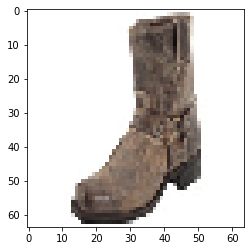

Boots


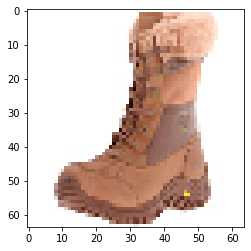

Sandals


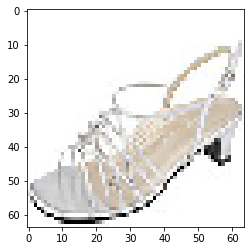

Boots


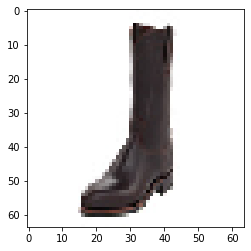

Boots


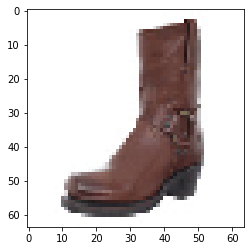

Boots


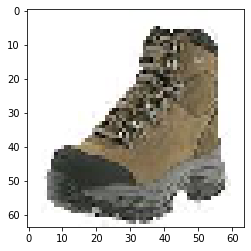

Boots


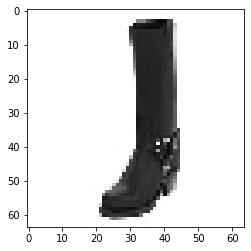

Boots


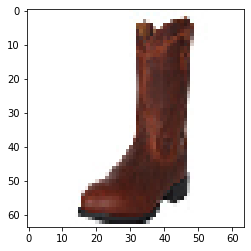

Boots


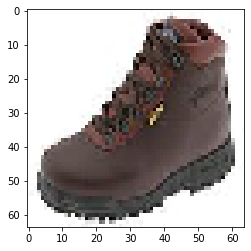

Boots


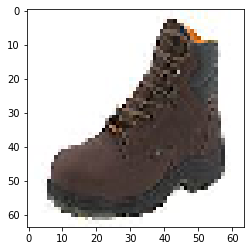

Boots


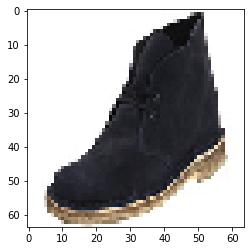

Boots


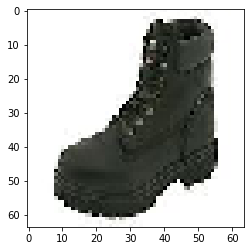

Boots


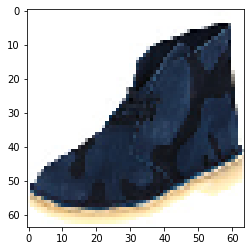

Boots


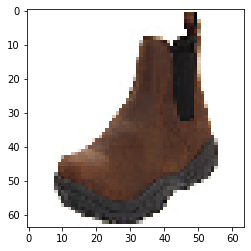

Slippers


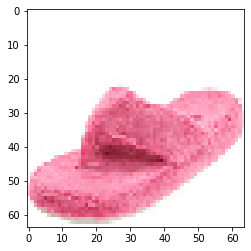

Slippers


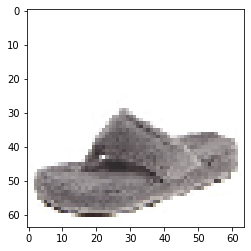

Boots


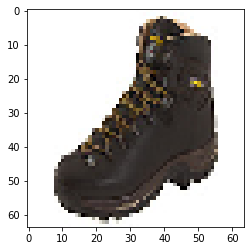

Boots


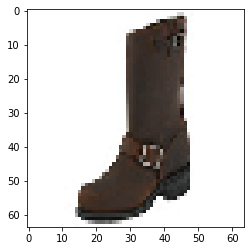

Boots


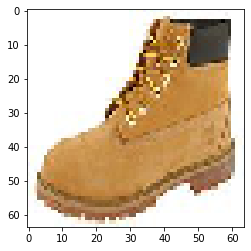

Sandals


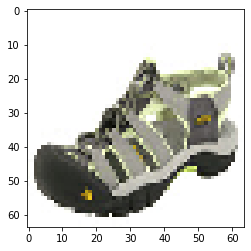

Sandals


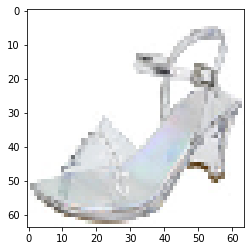

Boots


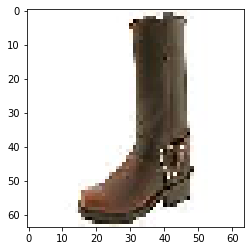

Boots


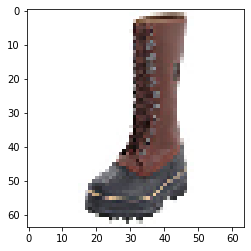

Sandals


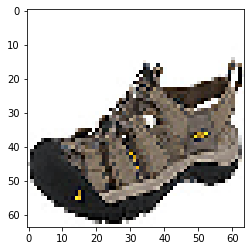

Sandals


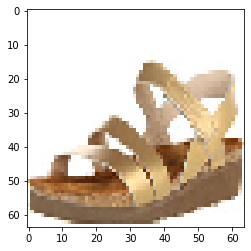

Sandals


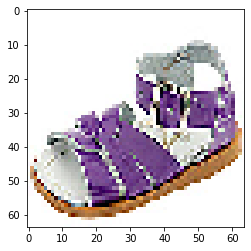

Boots


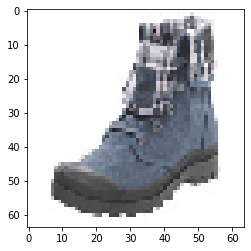

Boots


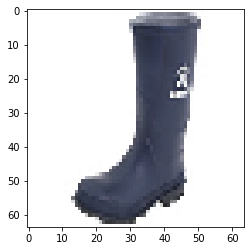

Boots


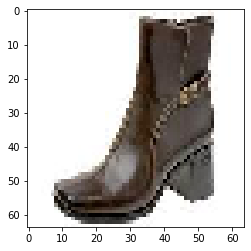

Sandals


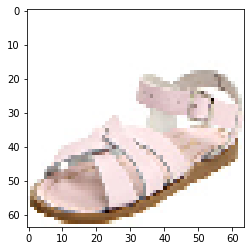

Boots


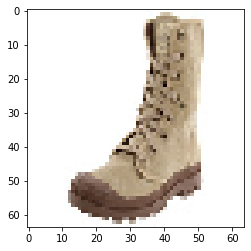

Boots


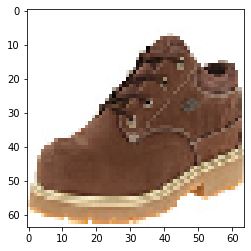

Sandals


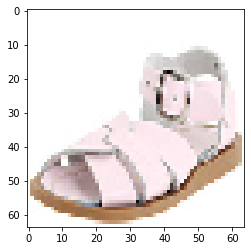

Boots


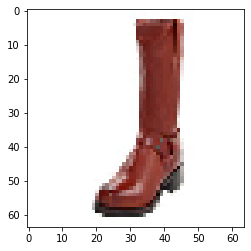

Boots


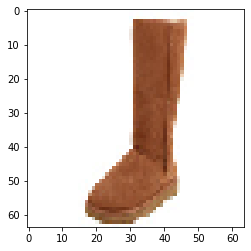

Sandals


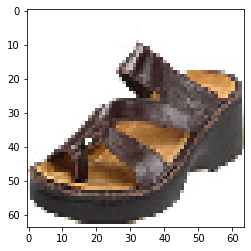

Boots


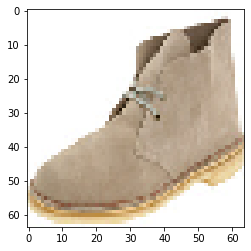

Slippers


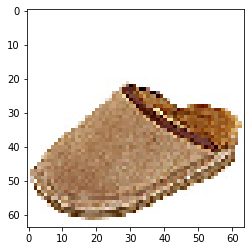

Boots


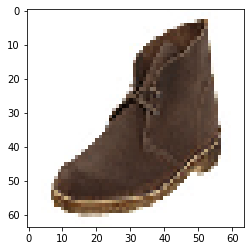

Slippers


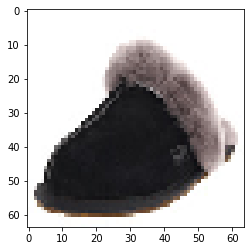

Boots


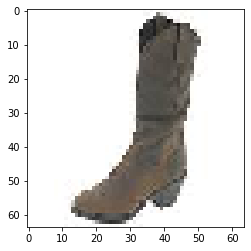

Boots


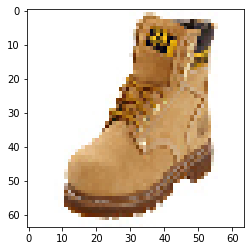

Sandals


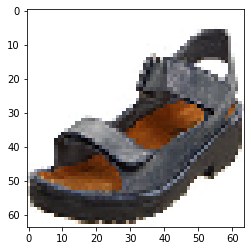

Sandals


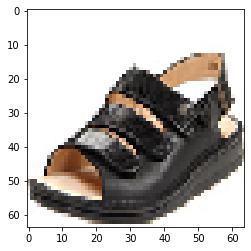

Sandals


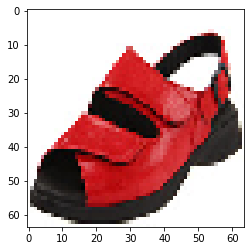

Sandals


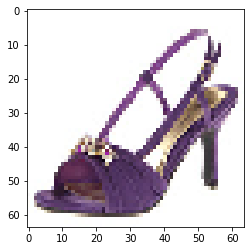

Slippers


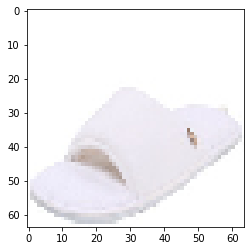

Slippers


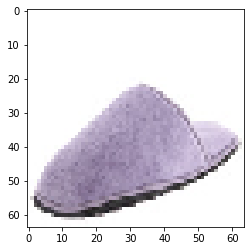

Sandals


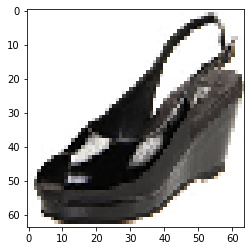

Sandals


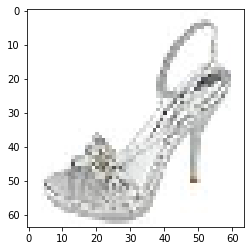

Slippers


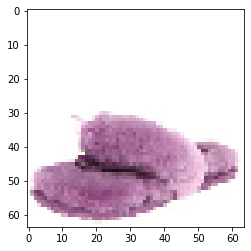

Slippers


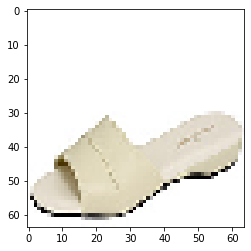

Sandals


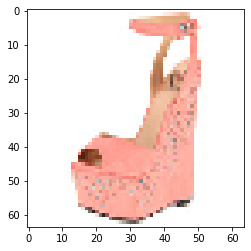

Sandals


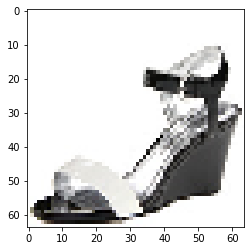

Sandals


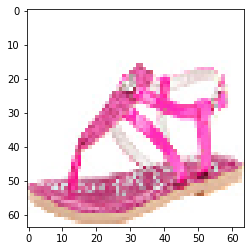

Slippers


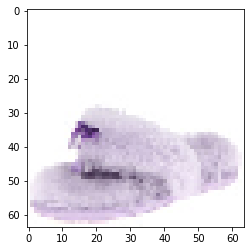

Slippers


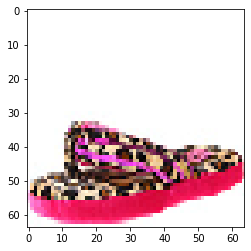

Sandals


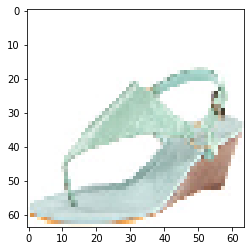

Sandals


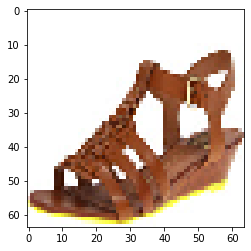

Slippers


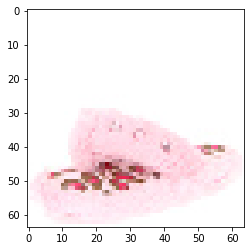

Slippers


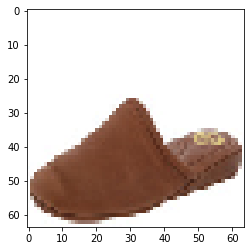

Slippers


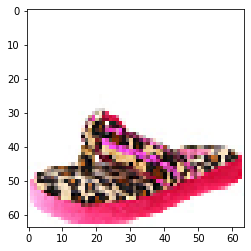

Slippers


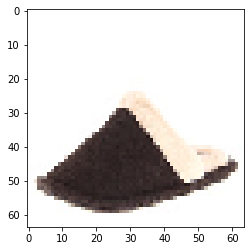

Slippers


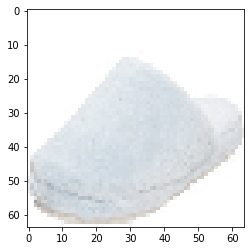

Slippers


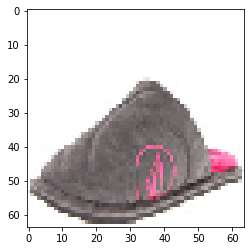

Slippers


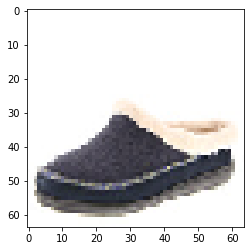

Slippers


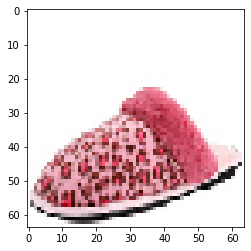

Slippers


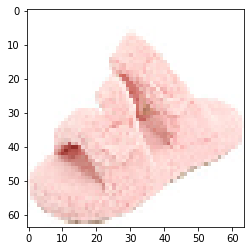

Boots


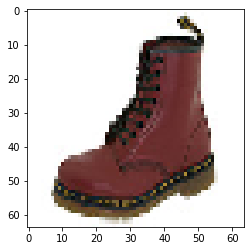

Slippers


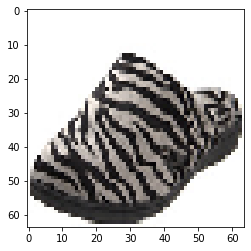

Sandals


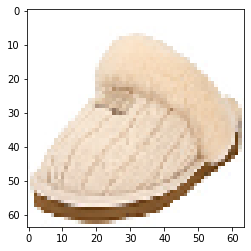

Slippers


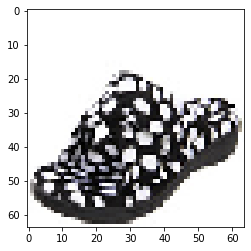

Slippers


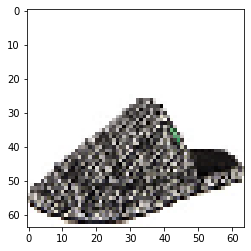

Slippers


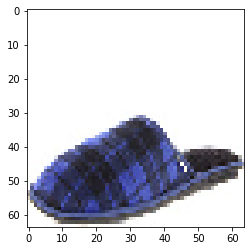

Slippers


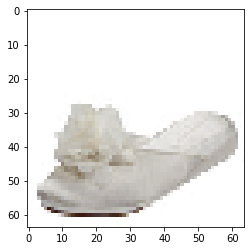

Sandals


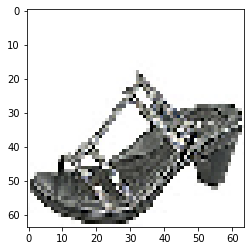

Sandals


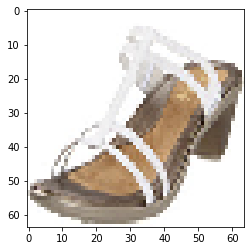

Sandals


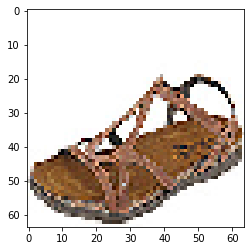

Slippers


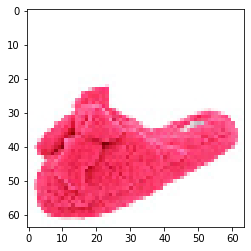

Slippers


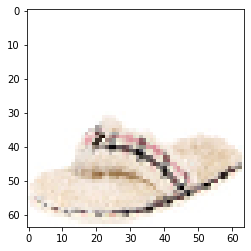

Slippers


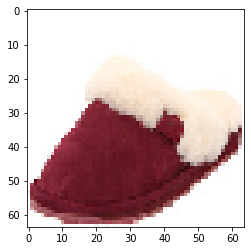

Slippers


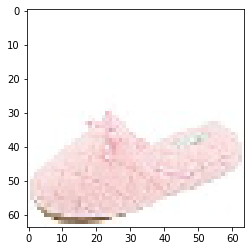

Slippers


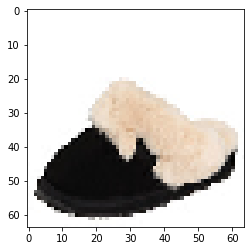

Boots


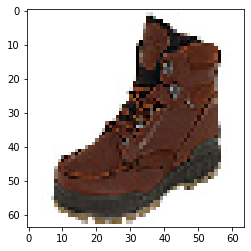

Sandals


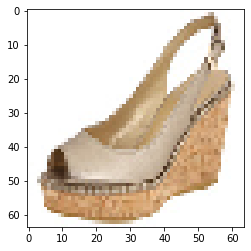

Slippers


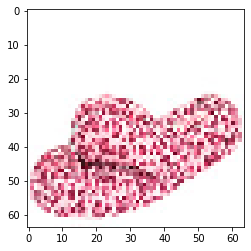

Sandals


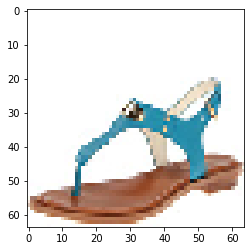

Sandals


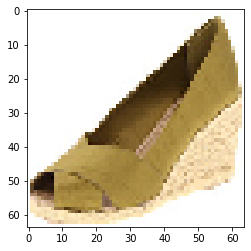

Slippers


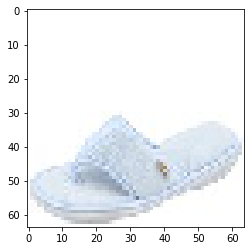

In [ ]:
from matplotlib import pyplot
for i,j in zip(file_path,result_test):
    new_image=image.load_img(i,target_size=(64,64))
    print(j)
    pyplot.imshow(new_image)
    pyplot.show()